In [220]:
import pandas as pd
from sklearn.metrics import roc_curve,accuracy_score,auc,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import minmax_scale
import numpy as np
import matplotlib.pyplot as mlp

In [8]:
col_used = ['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg','MSRP']

In [6]:
df = pd.read_csv('data.csv')
df_keepcol = df[col_used]

In [14]:
df_keepcol = df_keepcol.fillna(0)
df_keepcol.columns = [i.lower().replace(' ','_') for i in df_keepcol.columns]

In [19]:
mean = df_keepcol.msrp.mean()
df_keepcol.msrp = (df_keepcol.msrp > mean).astype('int')

In [31]:
_,train = train_test_split(df_keepcol,test_size=0.6,random_state=1)
test,val = train_test_split(_,test_size=0.5,random_state=1)

In [127]:
train_x = train.drop('msrp',axis=1)
train_y=  train.msrp
dv = DictVectorizer()
train_x = dv.fit_transform(train_x.to_dict(orient='records'))

In [135]:
test_x = test.drop('msrp',axis=1)
test_y=  test.msrp
test_x = dv.transform(test_x.to_dict(orient='records'))

In [185]:
val_x = val.drop('msrp',axis=1)
val_y=  val.msrp
val_x = dv.transform(val_x.to_dict(orient='records'))

In [137]:
model= LogisticRegression()
model.fit(train_x,train_y)
pred= model.predict(test_x)

c:\Users\B\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
int_col = list(df_keepcol.dtypes[df_keepcol.dtypes.isin(['int64','int','float'])].index) - ['year']
str_col = list(df_keepcol.dtypes[~df_keepcol.dtypes.isin(['int64','int','float'])].index)

In [184]:
# Q1
mm = minmax_scale(X=train[i])
test = train['msrp'].values.tolist()
for i in ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']:
    mm = minmax_scale(X=train[i]).round()
    fpr,tpr,_= roc_curve(mm,test)
    print(i)
    print(auc(fpr,tpr))
    # print(roc(mm,train['msrp'].values.tolist()))


engine_hp
0.8782144944476914
engine_cylinders
0.8657315731573157
highway_mpg
0.5745439215085084
city_mpg
0.5745439215085084


In [193]:
# Q2
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(train_x,train_y)
pred= model.predict_proba(val_x)[:,1].round()
roc_auc_score(val_y,pred).round(3)

0.917

In [206]:
np.linspace(0.01,1,100)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [265]:
# Q3
fpr =[]
tpr = []
acc = []
# for i in np.linspace(0.00,1,100):
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(train_x,train_y)
pred= model.predict_proba(val_x)[:,1] 
fp,tp,_ = roc_curve(val_y,pred)

fpr.append(fp)
tpr.append(tp)
acc.append(roc_auc_score(val_y,pred).round(3))

(0.0, 1.05)

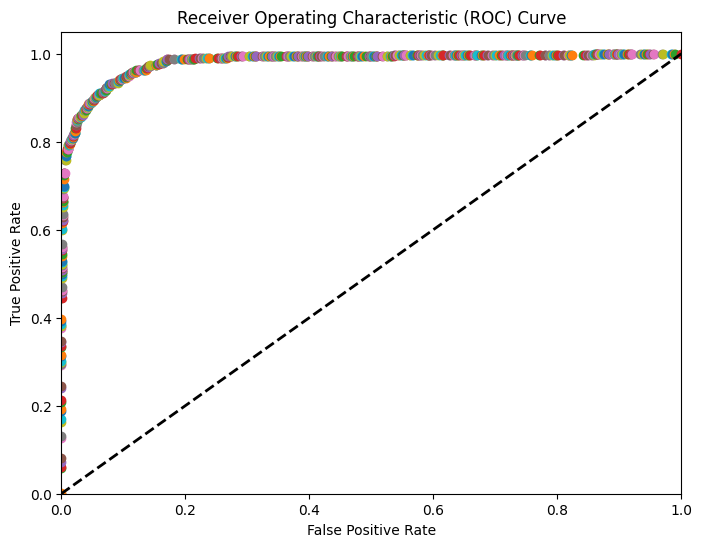

In [266]:
mlp.figure(figsize=(8, 6))
mlp.plot(fpr, tpr, marker='o', linestyle='-')

# Set labels and title
mlp.xlabel('False Positive Rate')
mlp.ylabel('True Positive Rate')
mlp.title('Receiver Operating Characteristic (ROC) Curve')

# Add a diagonal dashed line for reference (random classifier)
mlp.plot([0, 1], [0, 1], 'k--', linewidth=2)

# Set the x and y axis limits
mlp.xlim([0.0, 1.0])
mlp.ylim([0.0, 1.05])


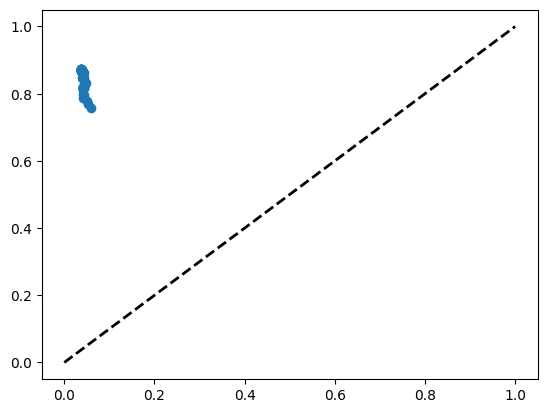

In [238]:
mlp.plot(fpr, tpr, marker='o', linestyle='-')
# Add a diagonal dashed line for reference (random classifier)
mlp.plot([0, 1], [0, 1], 'k--', linewidth=2)